In [1]:
#necessary Libraries
import numpy as np
import pandas as pd
import time
import pprint

#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
# magic word for producing visualizations in notebook
%matplotlib inline

#Preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA 
from scipy.sparse import lil_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#Models
from sklearn.naive_bayes import GaussianNB
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#Scoring Metrics
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
from sklearn.metrics import f1_score, fbeta_score
from sklearn.metrics import accuracy_score

In [2]:
# Load the dataset
file_path = r'C:\Users\Thesis2.0\django_thesis\KNN Algorithm\ap_data_9r_BE213.csv'
ap_data = pd.read_csv(file_path)

In [3]:
# Check the structure of the data after it's loaded 
#(print the number of rows and columns).
num_rows, num_cols  = ap_data.shape
print('Number of columns: {}'.format(num_cols))
print('Number of rows: {}'.format(num_rows))

Number of columns: 8
Number of rows: 18321


In [4]:
#check the statistics of the data per columns
ap_data.describe()

,channel,signal_strength,floorid,roomid
count,18321.000000,18321.000000,18321.000000,18321.0
mean,2417.468042,-70.774412,142.637083,213.0
std,4.952347,12.114967,26.791417,0.0
min,2412.000000,-99.000000,101.000000,213.0
25%,2412.000000,-80.000000,123.000000,213.0
50%,2417.000000,-70.000000,144.000000,213.0
75%,2422.000000,-62.000000,166.000000,213.0
max,2442.000000,-6.000000,187.000000,213.0


In [5]:
#Check the columns names
col_names = ap_data.columns.values
col_names

array(['mac_address', 'ssid', 'channel', 'source', 'signal_strength',
       'floorid', 'timestamp', 'roomid'], dtype=object)

In [6]:
#check for missing values
missing_values_count = ap_data.isnull().sum()
#uncomment this if you want to see the count of missing data per column
#missing_values_count

# how many total missing values do we have?
total_cells = np.product(ap_data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
missing_percent = (total_missing/total_cells) * 100

print('Percent of missing data = {}%'.format(missing_percent))

Percent of missing data = 0.0%


In [7]:
# Add a new column 'source_without_C' by removing 'C' from 'source'
ap_data['ssid'] = ap_data['ssid'].str.replace('C', '')

# Convert the 'source_without_C' column to numeric
ap_data['ssid'] = pd.to_numeric(ap_data['ssid'], errors='coerce')

In [8]:
#Assess unique values per columns
#unique_mac_address = ap_data["mac_address"].unique()
unique_ssid = ap_data["ssid"].unique()
unique_channel = ap_data["channel"].unique()
unique_floorid = ap_data["floorid"].unique()
unique_roomid = ap_data["roomid"].unique()

#print('Unique Mac Address : {}'.format(unique_mac_address))
print('Unique SSID : {}'.format(unique_ssid))
print('Unique Channel : {}'.format(unique_channel))

# Assuming unique_floorid is a NumPy array or a pandas Series
unique_floorid_sorted = np.sort(unique_floorid)

print('Unique Floor ID (Sorted):', unique_floorid_sorted)

print('Unique Room ID : {}'.format(unique_roomid))

unique_floorid_count = ap_data["floorid"].nunique()
print(f'Number of Unique Floor IDs: {unique_floorid_count}')

Unique SSID : [2 1]
Unique Channel : [2417 2427 2422 2412 2432 2437 2442]
Unique Floor ID (Sorted): [101 102 103 104 105 106 107 108 109 110 121 122 123 124 125 126 127 128
 129 130 141 142 143 144 145 146 147 148 149 150 161 162 163 164 165 166
 167 168 169 170 181 182 183 184 185 186 187]
Unique Room ID : [213]
Number of Unique Floor IDs: 47


In [9]:
ap_data = ap_data.drop(['mac_address'], axis=1)

#Check the columns names
col_names = ap_data.columns.values
col_names

array(['ssid', 'channel', 'source', 'signal_strength', 'floorid',
       'timestamp', 'roomid'], dtype=object)

In [36]:
# Define the columns for duplication check
duplication_columns = ['ssid', 'channel', 'source', 'signal_strength', 'floorid']

# Count the number of occurrences for each combination of columns
ap_data['duplication_count'] = ap_data.groupby(duplication_columns)['ssid'].transform('count')

# Filter rows where duplication count is greater than or equal to 4
filtered_data = ap_data[ap_data['duplication_count'] >= 6]

# Save the result to a new CSV file or modify the original dataframe as needed
filtered_data.to_csv('filtered_data.csv', index=False)

print(filtered_data)

# Group by duplication columns and aggregate values using, for example, the mean
merged_data = filtered_data.groupby(duplication_columns, as_index=False).mean()

# Drop the 'duplication_count' column if you don't need it in the final result
merged_data = merged_data.drop(columns=['duplication_count'])

# Save the result to a new CSV file or modify the original dataframe as needed
merged_data.to_csv('merged_data.csv', index=False)

print(merged_data)

       ssid  channel source  signal_strength  floorid            timestamp  \
10        2     2412   cap3              -88      101  2023-12-20 11:31:40   
15        2     2412   cap3              -88      101  2023-12-20 11:31:40   
18        2     2412   cap1              -58      101  2023-12-20 11:31:40   
20        2     2412   cap3              -88      101  2023-12-20 11:31:40   
25        2     2412   cap3              -88      101  2023-12-20 11:31:40   
...     ...      ...    ...              ...      ...                  ...   
18285     2     2412   cap2              -66      187  2023-12-20 11:31:40   
18287     2     2422   cap1              -51      187  2023-12-20 11:31:40   
18290     2     2412   cap2              -66      187  2023-12-20 11:31:40   
18295     2     2422   cap1              -51      187  2023-12-20 11:31:40   
18302     1     2417   cap1              -46      187  2023-12-20 11:31:40   

       roomid  duplication_count  
10        213               

In [37]:
#Assess unique values per columns
#unique_mac_address = ap_data["mac_address"].unique()
unique_ssid = merged_data["ssid"].unique()
unique_channel = merged_data["channel"].unique()
unique_floorid = merged_data["floorid"].unique()
unique_roomid = merged_data["roomid"].unique()

#print('Unique Mac Address : {}'.format(unique_mac_address))
print('Unique SSID : {}'.format(unique_ssid))
print('Unique Channel : {}'.format(unique_channel))
print('Unique Floor ID : {}'.format(unique_floorid))
print('Unique Room ID : {}'.format(unique_roomid))

unique_floorid_count = merged_data["floorid"].nunique()
print(f'Number of Unique Floor IDs: {unique_floorid_count}')


Unique SSID : [1 2]
Unique Channel : [2412 2417 2422 2427 2437]
Unique Floor ID : [127 122 107 121 130 142 143 147 102 129 101 161 108 124 126 103 109 150
 144 146 123 149 163 104 166 105 169 128 164 125 170 165 106 141 148 167
 181 110 184 145 183 162 187 168 185 182 186]
Unique Room ID : [213]
Number of Unique Floor IDs: 47


In [38]:
# Count unique channels for each ssid, floorid, and source
merge_data = merged_data.groupby(['ssid', 'floorid', 'source', 'roomid'])['channel'].nunique().reset_index()

print(merge_data)

     ssid  floorid source  roomid  channel
0       1      101   cap1     213        1
1       1      101   cap2     213        1
2       1      101   cap3     213        1
3       1      102   cap1     213        1
4       1      102   cap2     213        2
..    ...      ...    ...     ...      ...
270     2      186   cap2     213        2
271     2      186   cap3     213        2
272     2      187   cap1     213        2
273     2      187   cap2     213        2
274     2      187   cap3     213        2

[275 rows x 5 columns]


In [39]:
# Define a custom aggregation function to calculate the product
def calculate_product(x):
    return x.prod()

# Group by 'ssid' and 'floorid', then aggregate using the custom function
result = merge_data.groupby(['ssid', 'floorid']).agg({
    'channel': calculate_product
}).reset_index()

# Display the result
print(result)

# Continue from the previous code
total_sum_combination = result['channel'].sum()

# Display the total sum
print("Total Sum of 'channel' values:", total_sum_combination)


    ssid  floorid  channel
0      1      101        1
1      1      102        4
2      1      103        6
3      1      104        2
4      1      105        8
..   ...      ...      ...
89     2      183        4
90     2      184        8
91     2      185       12
92     2      186        8
93     2      187        8

[94 rows x 3 columns]
Total Sum of 'channel' values: 528


In [40]:
# Count the number of unique sources per 'ssid' and 'floorid'
result_counts = merge_data.groupby(['ssid', 'floorid'])['source'].nunique().reset_index()

# Rename the column to indicate the count of sources
result_counts = result_counts.rename(columns={'source': 'source_count'})

# Display the result
print(result_counts)

# Save the result to a new CSV file or modify the original dataframe as needed
result_counts.to_csv('source_count.csv', index=False)

    ssid  floorid  source_count
0      1      101             3
1      1      102             3
2      1      103             3
3      1      104             2
4      1      105             3
..   ...      ...           ...
89     2      183             3
90     2      184             3
91     2      185             3
92     2      186             3
93     2      187             3

[94 rows x 3 columns]


In [41]:
# Calculate total RSSI for each unique channel within each ssid, floorid, and source
total_number_rssi = merged_data.groupby(['ssid', 'floorid', 'source', 'channel'])['signal_strength'].nunique().reset_index()

total_number_rssi.to_csv('total_number_rssi.csv', index=False)

print(total_number_rssi)

     ssid  floorid source  channel  signal_strength
0       1      101   cap1     2412                1
1       1      101   cap2     2422                1
2       1      101   cap3     2412                1
3       1      102   cap1     2412                1
4       1      102   cap2     2417                2
..    ...      ...    ...      ...              ...
500     2      187   cap1     2422                1
501     2      187   cap2     2412                1
502     2      187   cap2     2417                1
503     2      187   cap3     2417                1
504     2      187   cap3     2422                1

[505 rows x 5 columns]


In [42]:
print(merged_data)

     ssid  channel source  signal_strength  floorid  roomid
0       1     2412   cap1              -68      127     213
1       1     2412   cap1              -67      122     213
2       1     2412   cap1              -66      107     213
3       1     2412   cap1              -64      121     213
4       1     2412   cap1              -63      121     213
..    ...      ...    ...              ...      ...     ...
851     2     2427   cap2              -83      107     213
852     2     2427   cap2              -80      107     213
853     2     2427   cap2              -79      106     213
854     2     2427   cap2              -75      107     213
855     2     2427   cap2              -69      130     213

[856 rows x 6 columns]


In [43]:
import pandas as pd
from itertools import product

start_time = time.time()


# Step 1: Identify missing sources and add rows with 0 channel and 100 signal_strength


# List of sources to check for each ssid and floorid combination
sources_to_check = ['cap1', 'cap2', 'cap3']

# Create a MultiIndex from ssid and floorid
index_cols = ['ssid', 'floorid']
multi_index = pd.MultiIndex.from_frame(merged_data[index_cols])

# Iterate over unique ssid and floorid combinations
for ssid, floorid in multi_index.unique():
    # Filter data for the current ssid and floorid
    subset = merged_data[(merged_data['ssid'] == ssid) & (merged_data['floorid'] == floorid)]
    
    # Get the sources present in the subset
    present_sources = subset['source'].unique()
    
    # Find the missing sources
    missing_sources = set(sources_to_check) - set(present_sources)
    
    # Add rows for missing sources
    for missing_source in missing_sources:
        merged_data = merged_data.append({
            'ssid': ssid,
            'channel': 0,
            'source': missing_source,
            'signal_strength': 100,
            'floorid': floorid,
            'roomid': subset['roomid'].iloc[0]  # Assuming roomid is the same for all rows in the subset
        }, ignore_index=True)

# Sort the DataFrame by ssid and floorid
merged_data = merged_data.sort_values(by=['ssid', 'floorid']).reset_index(drop=True)

# Remove rows where ssid is 0
merged_data = merged_data[merged_data['ssid'] != 0]

# Display the result
print(merged_data)

merged_data.to_csv('merged_data_with_0.csv', index=False)

print(merged_data)

# Step 2: Extract unique combinations of 'ssid', 'floorid', and 'roomid'
combinations = merged_data[['ssid', 'floorid', 'roomid']].drop_duplicates()

# Step 3: Calculate unique channels for each source
channel_counts = {}
for index, row in combinations.iterrows():
    ssid, floorid, roomid = row['ssid'], row['floorid'], row['roomid']
    channels = merged_data[(merged_data['ssid'] == ssid) & 
                           (merged_data['floorid'] == floorid) & 
                           (merged_data['roomid'] == roomid)].groupby('source')['channel'].unique()
    channel_counts[(ssid, floorid, roomid)] = channels

print(channel_counts)

# Step 4 and 5: Generate combinations and create DataFrame
combinations_list = []
for (ssid, floorid, roomid), channels in channel_counts.items():
    for source, channel_list in channels.items():
        for channel in channel_list:
            signal_strengths = merged_data[
                (merged_data['ssid'] == ssid) &
                (merged_data['floorid'] == floorid) &
                (merged_data['roomid'] == roomid) &
                (merged_data['source'] == source) &
                (merged_data['channel'] == channel)
            ]['signal_strength'].tolist()

            total_signal_strengths = len(signal_strengths)

            print(f'SSID: {ssid}, FloorID: {floorid}, RoomID: {roomid}, Total Number of Signal Strength for {source} channel {channel}: {total_signal_strengths}')

            combination = [ssid, floorid, roomid, source, f'channel_{channel}_signal_strength_{source}', signal_strengths]
            combinations_list.append(combination)

            
print(combinations_list)

print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))

     ssid  channel source  signal_strength  floorid  roomid
0       1     2412   cap1              -59      101     213
1       1     2412   cap3              -86      101     213
2       1     2422   cap2              -64      101     213
3       1     2412   cap1              -61      102     213
4       1     2412   cap3              -88      102     213
..    ...      ...    ...              ...      ...     ...
858     2     2417   cap1              -45      187     213
859     2     2417   cap2              -56      187     213
860     2     2417   cap3              -82      187     213
861     2     2422   cap1              -51      187     213
862     2     2422   cap3              -73      187     213

[863 rows x 6 columns]
     ssid  channel source  signal_strength  floorid  roomid
0       1     2412   cap1              -59      101     213
1       1     2412   cap3              -86      101     213
2       1     2422   cap2              -64      101     213
3       1     24

SSID: 1, FloorID: 141, RoomID: 213, Total Number of Signal Strength for cap1 channel 2417: 1
SSID: 1, FloorID: 141, RoomID: 213, Total Number of Signal Strength for cap2 channel 2417: 1
SSID: 1, FloorID: 141, RoomID: 213, Total Number of Signal Strength for cap2 channel 2422: 2
SSID: 1, FloorID: 141, RoomID: 213, Total Number of Signal Strength for cap3 channel 2412: 4
SSID: 1, FloorID: 141, RoomID: 213, Total Number of Signal Strength for cap3 channel 2417: 1
SSID: 1, FloorID: 142, RoomID: 213, Total Number of Signal Strength for cap1 channel 2412: 1
SSID: 1, FloorID: 142, RoomID: 213, Total Number of Signal Strength for cap1 channel 2417: 2
SSID: 1, FloorID: 142, RoomID: 213, Total Number of Signal Strength for cap2 channel 2422: 3
SSID: 1, FloorID: 142, RoomID: 213, Total Number of Signal Strength for cap3 channel 2412: 2
SSID: 1, FloorID: 142, RoomID: 213, Total Number of Signal Strength for cap3 channel 2417: 2
SSID: 1, FloorID: 143, RoomID: 213, Total Number of Signal Strength fo

SSID: 1, FloorID: 169, RoomID: 213, Total Number of Signal Strength for cap2 channel 2417: 1
SSID: 1, FloorID: 169, RoomID: 213, Total Number of Signal Strength for cap3 channel 2412: 1
SSID: 1, FloorID: 169, RoomID: 213, Total Number of Signal Strength for cap3 channel 2417: 1
SSID: 1, FloorID: 169, RoomID: 213, Total Number of Signal Strength for cap3 channel 2422: 3
SSID: 1, FloorID: 170, RoomID: 213, Total Number of Signal Strength for cap1 channel 0: 1
SSID: 1, FloorID: 170, RoomID: 213, Total Number of Signal Strength for cap2 channel 2412: 1
SSID: 1, FloorID: 170, RoomID: 213, Total Number of Signal Strength for cap2 channel 2422: 1
SSID: 1, FloorID: 170, RoomID: 213, Total Number of Signal Strength for cap3 channel 2412: 3
SSID: 1, FloorID: 170, RoomID: 213, Total Number of Signal Strength for cap3 channel 2422: 1
SSID: 1, FloorID: 181, RoomID: 213, Total Number of Signal Strength for cap1 channel 2427: 2
SSID: 1, FloorID: 181, RoomID: 213, Total Number of Signal Strength for c

SSID: 2, FloorID: 121, RoomID: 213, Total Number of Signal Strength for cap1 channel 2422: 1
SSID: 2, FloorID: 121, RoomID: 213, Total Number of Signal Strength for cap2 channel 2412: 3
SSID: 2, FloorID: 121, RoomID: 213, Total Number of Signal Strength for cap2 channel 2417: 1
SSID: 2, FloorID: 121, RoomID: 213, Total Number of Signal Strength for cap3 channel 2412: 2
SSID: 2, FloorID: 122, RoomID: 213, Total Number of Signal Strength for cap1 channel 2412: 1
SSID: 2, FloorID: 122, RoomID: 213, Total Number of Signal Strength for cap1 channel 2422: 2
SSID: 2, FloorID: 122, RoomID: 213, Total Number of Signal Strength for cap1 channel 2427: 1
SSID: 2, FloorID: 122, RoomID: 213, Total Number of Signal Strength for cap2 channel 2422: 2
SSID: 2, FloorID: 122, RoomID: 213, Total Number of Signal Strength for cap3 channel 2412: 2
SSID: 2, FloorID: 123, RoomID: 213, Total Number of Signal Strength for cap1 channel 2412: 1
SSID: 2, FloorID: 123, RoomID: 213, Total Number of Signal Strength fo

SSID: 2, FloorID: 150, RoomID: 213, Total Number of Signal Strength for cap3 channel 2417: 1
SSID: 2, FloorID: 161, RoomID: 213, Total Number of Signal Strength for cap1 channel 2422: 1
SSID: 2, FloorID: 161, RoomID: 213, Total Number of Signal Strength for cap2 channel 2412: 2
SSID: 2, FloorID: 161, RoomID: 213, Total Number of Signal Strength for cap2 channel 2417: 1
SSID: 2, FloorID: 161, RoomID: 213, Total Number of Signal Strength for cap3 channel 2412: 3
SSID: 2, FloorID: 162, RoomID: 213, Total Number of Signal Strength for cap1 channel 2412: 1
SSID: 2, FloorID: 162, RoomID: 213, Total Number of Signal Strength for cap1 channel 2417: 2
SSID: 2, FloorID: 162, RoomID: 213, Total Number of Signal Strength for cap2 channel 2417: 1
SSID: 2, FloorID: 162, RoomID: 213, Total Number of Signal Strength for cap2 channel 2422: 1
SSID: 2, FloorID: 162, RoomID: 213, Total Number of Signal Strength for cap3 channel 2412: 1
SSID: 2, FloorID: 162, RoomID: 213, Total Number of Signal Strength fo

In [44]:
# Assuming the 'roomid' column is present in the 'merged_data' DataFrame

# Step 6: Combine the RSSI from each row
combined_rssi = pd.DataFrame(columns=['ssid', 'floorid', 'roomid', 'channel_cap1', 'channel_cap2', 'channel_cap3', 'signal_strength_cap1', 'signal_strength_cap2', 'signal_strength_cap3'])

for (ssid, floorid, roomid), channels in channel_counts.items():
    product_list = product(*(channels[source] for source in channels.keys()))

    for combination in product_list:
        row = {'ssid': ssid, 'floorid': floorid, 'roomid': merged_data[(merged_data['ssid'] == ssid) & (merged_data['floorid'] == floorid)]['roomid'].values[0]}
        for i, (source, channel) in enumerate(zip(channels.keys(), combination), start=1):
            row[f'channel_{source}'] = channel
            signal_strengths = merged_data[
                (merged_data['ssid'] == ssid) &
                (merged_data['floorid'] == floorid) &
                (merged_data['source'] == source) &
                (merged_data['channel'] == channel)
            ]['signal_strength'].tolist()

            row[f'signal_strength_cap{i}'] = signal_strengths if signal_strengths else None

        combined_rssi = combined_rssi.append(row, ignore_index=True)

print(combined_rssi)
combined_rssi.to_csv('combined_rssi_213.csv', index=False)

    ssid floorid roomid channel_cap1 channel_cap2 channel_cap3  \
0      1     101    213         2412         2422         2412   
1      1     102    213         2412         2417         2412   
2      1     102    213         2412         2417         2417   
3      1     102    213         2412         2422         2412   
4      1     102    213         2412         2422         2417   
..   ...     ...    ...          ...          ...          ...   
523    2     187    213         2417         2417         2422   
524    2     187    213         2422         2412         2417   
525    2     187    213         2422         2412         2422   
526    2     187    213         2422         2417         2417   
527    2     187    213         2422         2417         2422   

    signal_strength_cap1 signal_strength_cap2 signal_strength_cap3  
0                  [-59]                [-64]                [-86]  
1                  [-61]           [-68, -66]           [-88, -87]  


In [45]:
# Step 7: Combine the RSSI from each row
combined_rssi_final = pd.DataFrame(columns=combined_rssi.columns)  # Initialize an empty DataFrame

for index, row in combined_rssi.head(total_sum_combination).iterrows():  # Iterate only over the first 9 rows
    ssid, floorid, roomid, channel_cap1, channel_cap2, channel_cap3 = row['ssid'], row['floorid'], row['roomid'], row['channel_cap1'], row['channel_cap2'], row['channel_cap3']
    
    # Create all possible combinations of signal strengths
    signal_strengths = [row['signal_strength_cap1'], row['signal_strength_cap2'], row['signal_strength_cap3']]
    
    # Handle the case where signal strength is an integer (100)
    signal_combinations = [signal if isinstance(signal, list) else [signal] for signal in signal_strengths]
    
    for signal_combination in product(*signal_combinations):
        combined_rssi_final = combined_rssi_final.append({
            'ssid': ssid,
            'floorid': floorid,
            'roomid': roomid,
            'channel_cap1': channel_cap1,
            'channel_cap2': channel_cap2,
            'channel_cap3': channel_cap3,
            'signal_strength_cap1': signal_combination[0],
            'signal_strength_cap2': signal_combination[1],
            'signal_strength_cap3': signal_combination[2]
        }, ignore_index=True)

# Display the result
print(combined_rssi_final)

combined_rssi_final.to_csv('combined_rssi_final_be213.csv', index=False)


     ssid floorid roomid channel_cap1 channel_cap2 channel_cap3  \
0       1     101    213         2412         2422         2412   
1       1     102    213         2412         2417         2412   
2       1     102    213         2412         2417         2412   
3       1     102    213         2412         2417         2412   
4       1     102    213         2412         2417         2412   
...   ...     ...    ...          ...          ...          ...   
2699    2     187    213         2417         2417         2422   
2700    2     187    213         2422         2412         2417   
2701    2     187    213         2422         2412         2422   
2702    2     187    213         2422         2417         2417   
2703    2     187    213         2422         2417         2422   

     signal_strength_cap1 signal_strength_cap2 signal_strength_cap3  
0                     -59                  -64                  -86  
1                     -61                  -68         

In [46]:
# Check the structure of the data after it's loaded 
#(print the number of rows and columns).
num_rows, num_cols  = combined_rssi_final.shape
print('Number of columns: {}'.format(num_cols))
print('Number of rows: {}'.format(num_rows))

Number of columns: 9
Number of rows: 2704


In [326]:
#Preprocess the Training Data Set //////////////////////////////////////////////////////////////////////////////////////////////

In [21]:
# Load the dataset
trainingData = combined_rssi_final

print(trainingData)

     ssid floorid roomid channel_cap1 channel_cap2 channel_cap3  \
0       1     101    213         2412         2412         2412   
1       1     101    213         2412         2412         2412   
2       1     101    213         2412         2422         2412   
3       1     101    213         2412         2422         2412   
4       1     101    213         2412         2422         2412   
...   ...     ...    ...          ...          ...          ...   
7847    2     187    213         2422         2417         2417   
7848    2     187    213         2422         2417         2422   
7849    2     187    213         2422         2417         2422   
7850    2     187    213         2422         2417         2422   
7851    2     187    213         2422         2417         2422   

     signal_strength_cap1 signal_strength_cap2 signal_strength_cap3  
0                     -59                  -65                  -86  
1                     -58                  -65         

In [22]:
def clean_data(df):
    """
    Perform feature trimming, and engineering for trainingData
    Will also be applied to validationData
    
    INPUT: trainingData DataFrame
    OUTPUT: Trimmed and cleaned trainingData DataFrame
    """
    
    # Reverse the representation for the values. 100=0 and teh values range from 0-105 (weakest to strongest)
    #"The intensity values are represented as negative integer values ranging -104dBm (extremely poor signal) to 0dbM.
    #The positive value 100 is used to denote when a WAP was not detected."
    
    '''
    df.iloc[:, 5:8] = np.where(df.iloc[:, 5:8] <= 0, 
                df.iloc[:, 5:8] + 105, 
                df.iloc[:, 5:8] - 100)
    '''
    
    '''
    df.iloc[:, 6:9] = np.where(df.iloc[:, 6:9] > 2000, 
                df.iloc[:, 6:9] - 2300, 
                df.iloc[:, 6:9] - 0)
    '''
    
    '''
    # Remove rows if there are two zeroes in a row in the cap_channel
    df = df[
    ~((df['channel_cap1'] == 0) & (df['channel_cap2'] == 0)) &
    ~((df['channel_cap1'] == 0) & (df['channel_cap3'] == 0)) &
    ~((df['channel_cap2'] == 0) & (df['channel_cap3'] == 0))
    ]

    
    # Remove rows if there are one zeroes in a row in the cap_channel
    df = df[
    ~((df['channel_cap1'] == 0)) &
    ~((df['channel_cap2'] == 0)) &
    ~((df['channel_cap3'] == 0)) 
    ]
    '''

    # Return the cleaned dataframe.
    return df 

In [23]:
#Apply Cleaning

trainingData  = clean_data(trainingData)
cleaned_data = trainingData


trainingData.to_csv('trainingData-ap_data_ap_data_8.csv', index=False)

print(trainingData)

     ssid floorid roomid channel_cap1 channel_cap2 channel_cap3  \
0       1     101    213         2412         2412         2412   
1       1     101    213         2412         2412         2412   
2       1     101    213         2412         2422         2412   
3       1     101    213         2412         2422         2412   
4       1     101    213         2412         2422         2412   
...   ...     ...    ...          ...          ...          ...   
7847    2     187    213         2422         2417         2417   
7848    2     187    213         2422         2417         2422   
7849    2     187    213         2422         2417         2422   
7850    2     187    213         2422         2417         2422   
7851    2     187    213         2422         2417         2422   

     signal_strength_cap1 signal_strength_cap2 signal_strength_cap3  
0                     -59                  -65                  -86  
1                     -58                  -65         

In [24]:
#Assess unique values per columns
#unique_mac_address = ap_data["mac_address"].unique()
unique_ssid = trainingData["ssid"].unique()
unique_channel_cap1 = trainingData["channel_cap1"].unique()
unique_channel_cap2 = trainingData["channel_cap2"].unique()
unique_channel_cap3 = trainingData["channel_cap3"].unique()
unique_floorid = trainingData["floorid"].unique()
unique_roomid = trainingData["roomid"].unique()

#print('Unique Mac Address : {}'.format(unique_mac_address))
print('Unique SSID : {}'.format(unique_ssid))
print('Unique Channel cap1 : {}'.format(unique_channel_cap1))
print('Unique Channel cap2: {}'.format(unique_channel_cap2))
print('Unique Channel cap3: {}'.format(unique_channel_cap3))

# Assuming unique_floorid is a NumPy array or a pandas Series
unique_floorid_sorted = np.sort(unique_floorid)

print('Unique Floor ID (Sorted):', unique_floorid_sorted)

print('Unique Room ID : {}'.format(unique_roomid))

unique_channels_combined = np.union1d(np.union1d(unique_channel_cap1, unique_channel_cap2), unique_channel_cap3)

print('Unique Channel combined:', unique_channels_combined)

unique_floorid_count = trainingData["floorid"].nunique()
print(f'Number of Unique Floor IDs: {unique_floorid_count}')

Unique SSID : [1 2]
Unique Channel cap1 : [2412 2427 2417 2422 2437 2432]
Unique Channel cap2: [2412 2422 2417 2427]
Unique Channel cap3: [2412 2417 2422]
Unique Floor ID (Sorted): [101 102 103 104 105 106 107 108 109 110 121 122 123 124 125 126 127 128
 129 130 141 142 143 144 145 146 147 148 149 150 161 162 163 164 165 166
 167 168 169 170 181 182 183 184 185 186 187]
Unique Room ID : [213]
Unique Channel combined: [2412 2417 2422 2427 2432 2437]
Number of Unique Floor IDs: 47


In [25]:
import pandas as pd

def preprocess_data(df):
    """
    Separates trainingData into Features and Targets
    Will also be applied to validationData
    
    INPUT: Cleaned trainingData DataFrame
    OUTPUT: trainingData as Features and Targets
    """
    # split the data set into features and targets(Floor and BuildingID)
    X = df.drop(['floorid', 'roomid'], axis=1)
    y = df[['floorid', 'roomid']]
    
    # Extract unique channel values
    unique_channels = sorted(set(df['channel_cap1'].unique()) | set(df['channel_cap2'].unique()) | set(df['channel_cap3'].unique()))
    
    # Create new one-hot encoded columns
    for channel in unique_channels:
        X[f'channel_cap1_{channel}'] = (df['channel_cap1'] == channel).astype(int)
        X[f'channel_cap2_{channel}'] = (df['channel_cap2'] == channel).astype(int)
        X[f'channel_cap3_{channel}'] = (df['channel_cap3'] == channel).astype(int)
    
    # Drop the original 'channel_cap1', 'channel_cap2', and 'channel_cap3' columns
    X.drop(['channel_cap1', 'channel_cap2', 'channel_cap3'], axis=1, inplace=True)
    
    # Iterate over signal strength caps and channels to perform multiplication
    signal_columns = ['signal_strength_cap1', 'signal_strength_cap2', 'signal_strength_cap3']
    
    for signal_col in signal_columns:
        for channel in unique_channels:
            channel_col1 = f'channel_cap1_{channel}'
            channel_col2 = f'channel_cap2_{channel}'
            channel_col3 = f'channel_cap3_{channel}'
            
            if signal_col.endswith('cap1'):
                X[f'{signal_col}_{channel_col1}'] = df[signal_col] * X[channel_col1]
            elif signal_col.endswith('cap2'):
                X[f'{signal_col}_{channel_col2}'] = df[signal_col] * X[channel_col2]
            elif signal_col.endswith('cap3'):
                X[f'{signal_col}_{channel_col3}'] = df[signal_col] * X[channel_col3]

    # Drop the original 'signal_strength' columns
    X.drop(['signal_strength_cap1', 'signal_strength_cap2', 'signal_strength_cap3'], axis=1, inplace=True)
    
    # Drop unwanted columns
    unwanted_columns = [f'channel_cap{i}_{cap}' for i in range(1, 4) for cap in unique_channels]
    X.drop(unwanted_columns, axis=1, inplace=True)
    
    # create Dummies for the targets to feed into the model
    y = pd.get_dummies(data=y, columns=['floorid', 'roomid'])
    
    return X, y


In [26]:
#Apply preprocessing

X, y = preprocess_data(trainingData)


X.to_csv('X_train.csv', index=False)
y.to_csv('y_train.csv', index=False)

In [27]:
print(X)

'''
# Replace 'output_file.csv' with the desired file name
output_file = 'preprocessed_data2.csv'

# Save the DataFrame to a CSV file
X.to_csv(output_file, index=False)
'''


     ssid signal_strength_cap1_channel_cap1_2412  \
0       1                                    -59   
1       1                                    -58   
2       1                                    -59   
3       1                                    -59   
4       1                                    -58   
...   ...                                    ...   
7847    2                                      0   
7848    2                                      0   
7849    2                                      0   
7850    2                                      0   
7851    2                                      0   

     signal_strength_cap1_channel_cap1_2417  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   
...                                     ...   
7847                                      0   

"\n# Replace 'output_file.csv' with the desired file name\noutput_file = 'preprocessed_data2.csv'\n\n# Save the DataFrame to a CSV file\nX.to_csv(output_file, index=False)\n"

In [28]:
print(y)


      floorid_101  floorid_102  floorid_103  floorid_104  floorid_105  \
0               1            0            0            0            0   
1               1            0            0            0            0   
2               1            0            0            0            0   
3               1            0            0            0            0   
4               1            0            0            0            0   
...           ...          ...          ...          ...          ...   
7847            0            0            0            0            0   
7848            0            0            0            0            0   
7849            0            0            0            0            0   
7850            0            0            0            0            0   
7851            0            0            0            0            0   

      floorid_106  floorid_107  floorid_108  floorid_109  floorid_110  ...  \
0               0            0            0  

In [29]:
def split_data(preprocess_data):
# TO AVOID OVERFITTING: Split the training data into training and testing sets 
    global X_train
    global X_test
    global y_train
    global y_test
    
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y, 
                                                        test_size = 0.20, 
                                                        random_state = 42,
                                                        shuffle=True)

    # Show the results of the split
    print("Training set has {} samples.".format(X_train.shape[0]))
    print("Testing set has {} samples.".format(X_test.shape[0]))
    return X_train, X_test, y_train, y_test

In [30]:
#Apply split data

X_train, X_test, y_train, y_test = split_data(preprocess_data)



Training set has 6281 samples.
Testing set has 1571 samples.


In [31]:
print(X_train)

# Assuming X_train is your NumPy array
#np.savetxt('X_train.csv', X_train, delimiter=',', fmt='%s')

     ssid signal_strength_cap1_channel_cap1_2412  \
5520    2                                    -53   
7675    2                                      0   
2191    1                                      0   
7659    2                                      0   
5202    2                                      0   
...   ...                                    ...   
5226    2                                      0   
5390    2                                      0   
860     1                                    -56   
7603    2                                    -51   
7270    2                                      0   

     signal_strength_cap1_channel_cap1_2417  \
5520                                      0   
7675                                    -56   
2191                                    -67   
7659                                    -50   
5202                                    -55   
...                                     ...   
5226                                      0   

In [32]:
print(y_train)

# Assuming X_train is your NumPy array
#np.savetxt('y_train.csv', y_train, delimiter=',', fmt='%s')

      floorid_101  floorid_102  floorid_103  floorid_104  floorid_105  \
5520            0            0            0            0            0   
7675            0            0            0            0            0   
2191            0            0            0            0            0   
7659            0            0            0            0            0   
5202            0            0            0            0            0   
...           ...          ...          ...          ...          ...   
5226            0            0            0            0            0   
5390            0            0            0            0            0   
860             0            0            0            0            0   
7603            0            0            0            0            0   
7270            0            0            0            0            0   

      floorid_106  floorid_107  floorid_108  floorid_109  floorid_110  ...  \
5520            0            0            0  

In [34]:
start_time = time.time()

#Scale Data with Standard Scaler

scaler = StandardScaler()

#Fit only the training set
#this will help us transform the validation data 
scaler.fit(X_train)
    
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


k = 1  # You can adjust the value of k
knn = KNeighborsClassifier(n_neighbors=k, p=2, metric = 'euclidean')  # p=2 for Euclidean metric
knn.fit(X_train, y_train)

# Assuming 'knn' is your trained KNN classifier
# Assuming 'X_test' and 'y_test' are your test features and labels
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

from sklearn.metrics import classification_report


# Replace this list with the actual classes present in your data
column_names = y_train.columns  

# Print classification report
report = classification_report(y_test, y_pred, target_names=column_names)
print(report)


'''
print(y_pred)

#See the predictions and translate them

#map the labels to their name
labels = y.columns.tolist() 
lables_dict = {key: i for i, key in enumerate(labels)}

#Turn predictions into readable list of lists
my_predictions = y_pred.rows.tolist()

#translate the values to their keys.
#Change the my_predictions[0] value to
#my_predictions[index_value] to translate insights
for i in range(len(y_test)):
    get_keys = [k for k, v in lables_dict.items() 
                if v in my_predictions[i]]

    print(f'{i+1}',get_keys)
'''
    
print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))

Accuracy: 85.68%
              precision    recall  f1-score   support

 floorid_101       0.86      0.55      0.67        11
 floorid_102       0.95      0.95      0.95        20
 floorid_103       0.85      0.89      0.87        38
 floorid_104       0.91      0.91      0.91        22
 floorid_105       0.85      0.89      0.87        53
 floorid_106       0.72      0.87      0.79        15
 floorid_107       0.78      0.70      0.74        61
 floorid_108       0.33      0.60      0.43        10
 floorid_109       0.88      0.81      0.84        26
 floorid_110       1.00      0.94      0.97        17
 floorid_121       0.83      0.68      0.75        22
 floorid_122       0.56      0.56      0.56         9
 floorid_123       0.92      0.96      0.94        23
 floorid_124       0.83      0.91      0.87        32
 floorid_125       0.89      0.76      0.82        21
 floorid_126       0.85      0.81      0.83        70
 floorid_127       0.83      0.86      0.85        35
 floorid_1

In [394]:
# Assuming 'y_train' is your true labels array
column_names = y_train.columns

for i, y_pred in enumerate(y_pred):
    print(f"\nPrediction {i + 1}:")
    print(f"Column names with 'True' predictions:")

    #Find the indices where the value is True for the current prediction
    true_indices = np.where(y_pred == 1)[0]

    # Remove the 'floorid_' prefix when printing the column names
    true_column_names = [column.replace('floorid_', '') for column in column_names[true_indices]]
    print("Column names with 'True' predictions:", true_column_names)

    # Add predicted floorid to the scanned data
    #cleaned_data.loc[cleaned_data.index[i], 'predicted_floorid'] = true_column_names[0]
    
print(cleaned_data)

cleaned_data.to_csv('predicted_data.csv', index=False)

TypeError: 'numpy.uint8' object is not iterable

IndentationError: unexpected indent (<ipython-input-356-c4a8c3ec36d5>, line 2)

In [ ]:
print(len(y_test), len(y_pred))  # Print lengths to identify the issue

# Print the content of y_test and y_pred for further inspection
print("y_test:", y_test)
print("y_pred:", y_pred)

# Save y_test and y_pred as CSV files
np.savetxt('y_test.csv', y_test, delimiter=',', fmt='%d')
np.savetxt('y_pred.csv', y_pred, delimiter=',', fmt='%d')

# Assuming y_test is a DataFrame and y_pred is a NumPy array
y_test_df = pd.DataFrame(y_test)
y_test_df.to_csv('y_test.csv', index=False)

# y_pred is a NumPy array
np.savetxt('y_pred.csv', y_pred, delimiter=',', fmt='%d')


In [71]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for each sample
accuracy_per_sample = [accuracy_score(y_test.iloc[i], y_pred[i]) for i in range(len(y_test))]

# Display accuracy for each sample
for i, accuracy in enumerate(accuracy_per_sample):
    print(f'Sample {i + 1} Accuracy: {accuracy * 100:.2f}%')


Sample 1 Accuracy: 100.00%
Sample 2 Accuracy: 100.00%
Sample 3 Accuracy: 100.00%
Sample 4 Accuracy: 100.00%
Sample 5 Accuracy: 100.00%
Sample 6 Accuracy: 100.00%
Sample 7 Accuracy: 100.00%
Sample 8 Accuracy: 100.00%
Sample 9 Accuracy: 100.00%
Sample 10 Accuracy: 100.00%
Sample 11 Accuracy: 100.00%
Sample 12 Accuracy: 100.00%
Sample 13 Accuracy: 100.00%
Sample 14 Accuracy: 100.00%
Sample 15 Accuracy: 100.00%
Sample 16 Accuracy: 100.00%
Sample 17 Accuracy: 100.00%
Sample 18 Accuracy: 100.00%
Sample 19 Accuracy: 100.00%
Sample 20 Accuracy: 100.00%
Sample 21 Accuracy: 100.00%
Sample 22 Accuracy: 100.00%
Sample 23 Accuracy: 100.00%
Sample 24 Accuracy: 100.00%
Sample 25 Accuracy: 100.00%
Sample 26 Accuracy: 100.00%
Sample 27 Accuracy: 100.00%
Sample 28 Accuracy: 100.00%
Sample 29 Accuracy: 100.00%
Sample 30 Accuracy: 100.00%
Sample 31 Accuracy: 100.00%
Sample 32 Accuracy: 100.00%
Sample 33 Accuracy: 100.00%
Sample 34 Accuracy: 100.00%
Sample 35 Accuracy: 100.00%
Sample 36 Accuracy: 100.00%
S

Sample 1150 Accuracy: 100.00%
Sample 1151 Accuracy: 100.00%
Sample 1152 Accuracy: 100.00%
Sample 1153 Accuracy: 100.00%
Sample 1154 Accuracy: 100.00%
Sample 1155 Accuracy: 100.00%
Sample 1156 Accuracy: 100.00%
Sample 1157 Accuracy: 100.00%
Sample 1158 Accuracy: 100.00%
Sample 1159 Accuracy: 100.00%
Sample 1160 Accuracy: 100.00%
Sample 1161 Accuracy: 100.00%
Sample 1162 Accuracy: 100.00%
Sample 1163 Accuracy: 100.00%
Sample 1164 Accuracy: 100.00%
Sample 1165 Accuracy: 100.00%
Sample 1166 Accuracy: 100.00%
Sample 1167 Accuracy: 100.00%
Sample 1168 Accuracy: 100.00%
Sample 1169 Accuracy: 100.00%
Sample 1170 Accuracy: 100.00%
Sample 1171 Accuracy: 100.00%
Sample 1172 Accuracy: 100.00%
Sample 1173 Accuracy: 100.00%
Sample 1174 Accuracy: 100.00%
Sample 1175 Accuracy: 100.00%
Sample 1176 Accuracy: 100.00%
Sample 1177 Accuracy: 100.00%
Sample 1178 Accuracy: 100.00%
Sample 1179 Accuracy: 100.00%
Sample 1180 Accuracy: 100.00%
Sample 1181 Accuracy: 100.00%
Sample 1182 Accuracy: 100.00%
Sample 118

In [72]:
from sklearn.metrics import multilabel_confusion_matrix

# Assuming y_test and y_pred are your true labels and predicted labels, respectively
# y_test and y_pred should be in a binary indicator format (e.g., using one-hot encoding)

cm = multilabel_confusion_matrix(y_test, y_pred)
print(cm)

[[[ 618    2]
  [   3  689]]

 [[ 926    3]
  [   2  381]]

 [[1075    0]
  [   0  237]]]


In [73]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

# Assuming y_test and y_pred are your true labels and predicted labels, respectively
# y_test and y_pred should be in a binary indicator format (e.g., using one-hot encoding)

# Convert y_test and y_pred to NumPy arrays
y_test_np = y_test.to_numpy()
y_pred_np = y_pred

# Calculate accuracy for each label
label_accuracies = [accuracy_score(y_test_np[:, i], y_pred_np[:, i]) for i in range(y_test_np.shape[1])]

# Display accuracy for each label
for i, accuracy in enumerate(label_accuracies):
    print(f'Label {i + 1} Accuracy: {accuracy * 100:.2f}%')


Label 1 Accuracy: 99.62%
Label 2 Accuracy: 99.62%
Label 3 Accuracy: 100.00%


In [190]:
#Apply PCA while keeping 95% of the variation in the data
pca = PCA(.95)

    
#Fit only the training set    
pca.fit(X_train)

# Apply PCA transform to both the training set and the test set.    
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("Number of PCA Components = {}.".format(pca.n_components_))
#print(pca.n_components_)
print("Total Variance Explained by PCA Components = {}.".format(pca.explained_variance_ratio_.sum()))
#print(pca.explained_variance_ratio_.sum())

Number of PCA Components = 28.
Total Variance Explained by PCA Components = 0.9523888861529712.


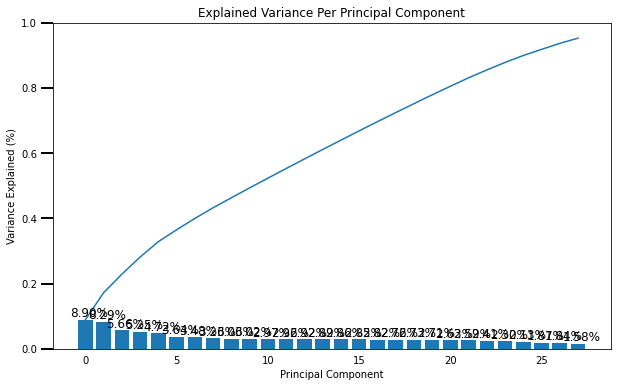

In [191]:
def pca_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
    
pca_plot(pca)

In [192]:
#Create sparse matrices to run the scikit multilearn algorithms

X_train_pca = lil_matrix(X_train_pca).toarray()
y_train = lil_matrix(y_train).toarray()
X_test_pca = lil_matrix(X_test_pca).toarray()
y_test = lil_matrix(y_test).toarray()

In [193]:
# using binary relevance
# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
start_time = time.time()

BR_classifier = BinaryRelevance(GaussianNB())
# train
BR_classifier.fit(X_train, y_train)
# predict
predictions = BR_classifier.predict(X_test)
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))

print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))


Accuracy =  0.006016847172081829
--- Run time: 0.09 mins ---


In [194]:
# initialize classifier chains multi-label classifier
# with a gaussian naive bayes base classifier
start_time = time.time()

CC_classifier = ClassifierChain(GaussianNB())

# train
CC_classifier.fit(X_train, y_train)

# predict
predictions = CC_classifier.predict(X_test)

accuracy_score(y_test,predictions)
print('Test accuracy is {}'.format(accuracy_score(y_test, predictions)))

print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))

Test accuracy is 0.06698756518251103
--- Run time: 0.45 mins ---


In [195]:
# initialize Label Powerset multi-label classifier
# with a gaussian naive bayes base classifier
start_time = time.time()

LP_classifier = LabelPowerset(GaussianNB())

# train
LP_classifier.fit(X_train, y_train)

# predict
predictions = LP_classifier.predict(X_test)

accuracy_score(y_test,predictions)
print('Test accuracy is {}'.format(accuracy_score(y_test, predictions)))

print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))

Test accuracy is 0.11070998796630566
--- Run time: 0.02 mins ---


In [196]:
start_time = time.time()

MLKNN_classifier = MLkNN(k=1)

# train
MLKNN_classifier.fit(X_train_pca, y_train)

# predict mlknn = 1
predictions = MLKNN_classifier.predict(X_test_pca)

print(predictions)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))

print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


  (0, 326)	1
  (0, 354)	1
  (1, 245)	1
  (1, 354)	1
  (2, 153)	1
  (2, 355)	1
  (3, 118)	1
  (3, 355)	1
  (4, 205)	1
  (4, 354)	1
  (5, 297)	1
  (5, 354)	1
  (6, 122)	1
  (6, 355)	1
  (7, 173)	1
  (7, 354)	1
  (8, 141)	1
  (8, 355)	1
  (9, 351)	1
  (9, 354)	1
  (10, 191)	1
  (10, 354)	1
  (11, 217)	1
  (11, 354)	1
  (12, 147)	1
  (12, 355)	1
  (13, 298)	1
  (13, 354)	1
  (14, 153)	1
  (14, 355)	1
  (15, 192)	1
  (15, 354)	1
  (16, 177)	1
  (16, 354)	1
  (17, 340)	1
  (17, 354)	1
  (18, 129)	1
  (18, 355)	1
  (19, 61)	1
  (19, 356)	1
  (20, 135)	1
  (20, 355)	1
  (21, 166)	1
  (21, 355)	1
  (22, 352)	1
  (22, 354)	1
  (23, 230)	1
  (23, 354)	1
  (24, 49)	1
  (24, 356)	1
  (25, 41)	1
  (25, 356)	1
  (26, 130)	1
  (26, 355)	1
  (27, 125)	1
  (27, 355)	1
  (28, 199)	1
  (28, 354)	1
  (29, 353)	1
  (29, 354)	1
  (30, 66)	1
  (30, 356)	1
  (31, 343)	1
  (31, 354)	1
  (32, 221)	1
  (32, 354)	1
  (33, 151)	1
  (33, 355)	1
  (34, 144)	1
  (34, 355)	1
  (35, 167)	1
  (35, 355)	1
  (36, 118)	1
  

In [ ]:
#This is takes a long time to run
#Find the optimal set of parameters

start_time = time.time()

parameters = {'k': range(1,100), 's': [0.5, 0.7, 1.0]}

score = 'accuracy'


clf = GridSearchCV(MLkNN(), parameters, scoring=score, cv=5)
clf.fit(X_train_pca, y_train)

print (clf.best_params_, clf.best_score_)
print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))

In [402]:
#See the predictions and translate them

#map the labels to their name
labels = y.columns.tolist() 
lables_dict = {key: i for i, key in enumerate(labels)}

#Turn predictions into readable list of lists
my_predictions = predictions.rows.tolist()

#translate the values to their keys.
#Change the my_predictions[0] value to
#my_predictions[index_value] to translate insights
for i in range(len(y_test)):
    get_keys = [k for k, v in lables_dict.items() 
                if v in my_predictions[i]]

    print(f'{i+1}',get_keys)

1 ['floorid_156', 'roomid_213']
2 ['floorid_42', 'roomid_214']
3 ['floorid_165', 'roomid_213']
4 ['floorid_353', 'roomid_111']
5 ['floorid_195', 'roomid_111']
6 ['floorid_212', 'roomid_111']
7 ['floorid_362', 'roomid_111']
8 ['floorid_163', 'roomid_213']
9 ['floorid_58', 'roomid_214']
10 ['floorid_16', 'roomid_214']
11 ['floorid_177', 'roomid_213']
12 ['floorid_169', 'roomid_213']
13 ['floorid_152', 'roomid_213']
14 ['floorid_165', 'roomid_213']
15 ['floorid_165', 'roomid_213']
16 ['floorid_171', 'roomid_213']
17 ['floorid_168', 'roomid_213']
18 ['floorid_136', 'roomid_213']
19 ['floorid_369', 'roomid_111']
20 ['floorid_230', 'roomid_111']
21 ['roomid_111']
22 ['floorid_140', 'roomid_213']
23 ['floorid_66', 'roomid_214']
24 ['floorid_189', 'roomid_213']
25 ['floorid_231', 'roomid_111']
26 ['floorid_228', 'roomid_111']
27 ['floorid_369', 'roomid_111']
28 ['floorid_366', 'roomid_111']
29 ['floorid_195', 'roomid_111']
30 ['floorid_153', 'roomid_213']
31 ['floorid_234', 'roomid_111']
32 ['

389 ['floorid_5', 'roomid_214']
390 ['floorid_280', 'roomid_111']
391 ['floorid_376', 'roomid_111']
392 ['floorid_355', 'roomid_111']
393 ['floorid_374', 'roomid_111']
394 ['floorid_373', 'roomid_111']
395 ['floorid_369', 'roomid_111']
396 ['floorid_228', 'roomid_111']
397 ['floorid_153', 'roomid_213']
398 ['floorid_181', 'roomid_213']
399 ['floorid_217', 'roomid_111']
400 ['floorid_233', 'roomid_111']
401 ['floorid_366', 'roomid_111']
402 ['floorid_373', 'roomid_111']
403 ['floorid_212', 'roomid_111']
404 ['floorid_374', 'roomid_111']
405 ['floorid_212', 'roomid_111']
406 ['floorid_106', 'roomid_213']
407 ['floorid_152', 'roomid_213']
408 ['roomid_111']
409 ['floorid_190', 'roomid_111']
410 ['floorid_122', 'roomid_213']
411 ['floorid_272', 'roomid_111']
412 ['floorid_136', 'roomid_213']
413 ['floorid_104', 'roomid_213']
414 ['floorid_363', 'roomid_111']
415 ['floorid_203', 'roomid_111']
416 ['floorid_246', 'roomid_111']
417 ['floorid_119', 'roomid_213']
418 ['floorid_220', 'roomid_111

782 ['floorid_366', 'roomid_111']
783 ['floorid_195', 'roomid_111']
784 ['floorid_175', 'roomid_213']
785 ['floorid_124', 'roomid_213']
786 ['floorid_63', 'roomid_214']
787 ['floorid_306', 'roomid_111']
788 ['floorid_332', 'roomid_111']
789 ['floorid_302', 'roomid_111']
790 ['floorid_142', 'roomid_213']
791 ['floorid_375', 'roomid_111']
792 ['floorid_221', 'roomid_111']
793 ['floorid_134', 'roomid_213']
794 ['floorid_40', 'roomid_214']
795 ['floorid_374', 'roomid_111']
796 ['floorid_205', 'roomid_111']
797 ['floorid_248', 'roomid_111']
798 ['floorid_202', 'roomid_111']
799 ['floorid_140', 'roomid_213']
800 ['floorid_204', 'roomid_111']
801 ['floorid_329', 'roomid_111']
802 ['floorid_331', 'roomid_111']
803 ['floorid_102', 'roomid_213']
804 ['floorid_245', 'roomid_111']
805 ['floorid_316', 'roomid_111']
806 ['floorid_53', 'roomid_214']
807 ['floorid_131', 'roomid_213']
808 ['floorid_373', 'roomid_111']
809 ['floorid_275', 'roomid_111']
810 ['floorid_370', 'roomid_111']
811 ['floorid_70'

1298 ['floorid_190', 'roomid_111']
1299 ['floorid_151', 'roomid_213']
1300 ['floorid_163', 'roomid_213']
1301 ['floorid_158', 'roomid_213']
1302 ['floorid_114', 'roomid_213']
1303 ['floorid_66', 'roomid_214']
1304 ['floorid_203', 'roomid_111']
1305 ['floorid_140', 'roomid_213']
1306 ['floorid_157', 'roomid_213']
1307 ['floorid_316', 'roomid_111']
1308 ['floorid_174', 'roomid_213']
1309 ['floorid_361', 'roomid_111']
1310 ['floorid_184', 'roomid_213']
1311 ['floorid_243', 'roomid_111']
1312 ['roomid_111']
1313 ['floorid_189', 'roomid_213']
1314 ['floorid_195', 'roomid_111']
1315 ['floorid_329', 'roomid_111']
1316 ['floorid_142', 'roomid_213']
1317 ['floorid_212', 'roomid_111']
1318 ['floorid_350', 'roomid_111']
1319 ['floorid_162', 'roomid_213']
1320 ['floorid_74', 'roomid_214']
1321 ['floorid_370', 'roomid_111']
1322 ['floorid_370', 'roomid_111']
1323 ['floorid_370', 'roomid_111']
1324 ['floorid_284', 'roomid_111']
1325 ['floorid_345', 'roomid_111']
1326 ['floorid_152', 'roomid_213']
13

1729 ['floorid_206', 'roomid_111']
1730 ['floorid_50', 'roomid_214']
1731 ['floorid_140', 'roomid_213']
1732 ['floorid_326', 'roomid_111']
1733 ['floorid_349', 'roomid_111']
1734 ['floorid_164', 'roomid_213']
1735 ['floorid_38', 'roomid_214']
1736 ['floorid_369', 'roomid_111']
1737 ['floorid_249', 'roomid_111']
1738 ['floorid_134', 'roomid_213']
1739 ['floorid_212', 'roomid_111']
1740 ['roomid_111']
1741 ['floorid_41', 'roomid_214']
1742 ['floorid_363', 'roomid_111']
1743 ['floorid_346', 'roomid_111']
1744 ['floorid_164', 'roomid_213']
1745 ['floorid_153', 'roomid_213']
1746 ['floorid_361', 'roomid_111']
1747 ['floorid_183', 'roomid_213']
1748 ['floorid_343', 'roomid_111']
1749 ['floorid_46', 'roomid_214']
1750 ['floorid_14', 'roomid_214']
1751 ['floorid_119', 'roomid_213']
1752 ['floorid_134', 'roomid_213']
1753 ['floorid_125', 'roomid_213']
1754 ['floorid_41', 'roomid_214']
1755 ['floorid_153', 'roomid_213']
1756 ['floorid_183', 'roomid_213']
1757 ['floorid_162', 'roomid_213']
1758 [

2329 ['floorid_46', 'roomid_214']
2330 ['floorid_248', 'roomid_111']
2331 ['floorid_267', 'roomid_111']
2332 ['floorid_174', 'roomid_213']
2333 ['floorid_309', 'roomid_111']
2334 ['floorid_213', 'roomid_111']
2335 ['floorid_107', 'roomid_213']
2336 ['floorid_290', 'roomid_111']
2337 ['floorid_67', 'roomid_214']
2338 ['floorid_375', 'roomid_111']
2339 ['floorid_218', 'roomid_111']
2340 ['floorid_363', 'roomid_111']
2341 ['floorid_370', 'roomid_111']
2342 ['floorid_40', 'roomid_214']
2343 ['floorid_158', 'roomid_213']
2344 ['floorid_50', 'roomid_214']
2345 ['floorid_194', 'roomid_111']
2346 ['floorid_343', 'roomid_111']
2347 ['floorid_190', 'roomid_111']
2348 ['floorid_298', 'roomid_111']
2349 ['floorid_180', 'roomid_213']
2350 ['floorid_291', 'roomid_111']
2351 ['floorid_229', 'roomid_111']
2352 ['floorid_376', 'roomid_111']
2353 ['floorid_256', 'roomid_111']
2354 ['floorid_370', 'roomid_111']
2355 ['floorid_182', 'roomid_213']
2356 ['floorid_233', 'roomid_111']
2357 ['floorid_269', 'ro

In [82]:
# Load the validationData
validationData = r'C:\Users\Thesis2.0\django_thesis\KNN Algorithm\validationData.csv'
validationData = pd.read_csv(validationData)

In [83]:
#Prepare Data for Model

#Clean data
validationData  = clean_data(validationData)

#preprocess
X_valid, y_valid = preprocess_data(validationData)

#scale
X_valid = scaler.transform(X_valid)

#pca
X_valid_pca = pca.transform(X_valid)

print("Number of PCA Components = {}.".format(pca.n_components_))

print("Total Variance Explained by PCA Components = {}.".format(pca.explained_variance_ratio_.sum()))

#Convert to sparse matrix
X_valid_pca = lil_matrix(X_valid_pca).toarray()
y_valid = lil_matrix(y_valid).toarray()

KeyError: "['roomid'] not found in axis"

In [84]:
from joblib import dump, load
dump(MLKNN_1_classifier, 'MLKNN_1_classifier.joblib')

NameError: name 'MLKNN_1_classifier' is not defined

In [85]:
#load pickled model
MLKNN_1_classifier = load('MLKNN_1_classifier.joblib') 

In [ ]:
# predict mlknn =1
valid_predictions = MLKNN_1_classifier.predict(X_valid_pca)

# accuracy
print("Accuracy = ",accuracy_score(y_valid,valid_predictions))